In [1]:
import pandas as pd
import numpy as np
import collections
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
train

,pair_id,name_1,name_2,is_duplicate
0,1,Iko Industries Ltd.,"Enormous Industrial Trade Pvt., Ltd.",0
1,2,Apcotex Industries Ltd.,Technocraft Industries (India) Ltd.,0
2,3,"Rishichem Distributors Pvt., Ltd.",Dsa,0
3,4,Powermax Rubber Factory,Co. One,0
4,5,Tress A/S,Longyou Industries Park Zhejiang,0
...,...,...,...,...
497814,497815,BIT-MAT PRODUCTS,The Goodyear Tire and Rubber Company,0
497815,497816,"Bnd Trading Co., Ltd.",Zhong Shan Yue Liang Economy& Trade Imp. & Exp...,0
497816,497817,"Xeikon Industrial Co., Ltd. Of Dongguan City","Yi Cheng Trading Co., Ltd. Of Dongguan City",0
497817,497818,"Shanghai Kechuan Trading Co., Ltd.",Shanghai M&G Stationery Inc.,0


In [3]:
def compute_tf(text):
    tf_text = collections.Counter(text)
    for i in tf_text:
        tf_text[i] = tf_text[i]/float(len(text))
    return tf_text

In [4]:
def counter(idf_dictionary, list2):
    counter, length = 0, 0
    for word in idf_dictionary:
        length += idf_dictionary[word]
        if word in list2:
            counter += idf_dictionary[word]
    return counter/length

In [5]:
train_preprocessing = train

train_preprocessing['name_1'] = train_preprocessing['name_1'].str.replace(r'[^\w\s]+', '').str.lower().str.split()
train_preprocessing['name_2'] = train_preprocessing['name_2'].str.replace(r'[^\w\s]+', '').str.lower().str.split()

train_preprocessing

C:\Users\7A4E~1\AppData\Local\Temp/ipykernel_12112/914922544.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  train_preprocessing['name_1'] = train_preprocessing['name_1'].str.replace(r'[^\w\s]+', '').str.lower().str.split()
C:\Users\7A4E~1\AppData\Local\Temp/ipykernel_12112/914922544.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  train_preprocessing['name_2'] = train_preprocessing['name_2'].str.replace(r'[^\w\s]+', '').str.lower().str.split()


,pair_id,name_1,name_2,is_duplicate
0,1,"[iko, industries, ltd]","[enormous, industrial, trade, pvt, ltd]",0
1,2,"[apcotex, industries, ltd]","[technocraft, industries, india, ltd]",0
2,3,"[rishichem, distributors, pvt, ltd]",[dsa],0
3,4,"[powermax, rubber, factory]","[co, one]",0
4,5,"[tress, as]","[longyou, industries, park, zhejiang]",0
...,...,...,...,...
497814,497815,"[bitmat, products]","[the, goodyear, tire, and, rubber, company]",0
497815,497816,"[bnd, trading, co, ltd]","[zhong, shan, yue, liang, economy, trade, imp,...",0
497816,497817,"[xeikon, industrial, co, ltd, of, dongguan, city]","[yi, cheng, trading, co, ltd, of, dongguan, city]",0
497817,497818,"[shanghai, kechuan, trading, co, ltd]","[shanghai, mg, stationery, inc]",0


In [6]:
corpus1 = train_preprocessing["name_1"].tolist()
corpus2 = train_preprocessing["name_2"].tolist()

corpus_name = []
for name in corpus1:
    corpus_name.extend(name)
for name in corpus2:
    corpus_name.extend(name)    
    
tf_name = compute_tf(corpus_name)
tf_name

Counter({'iko': 0.0003050301658921795,
         'industries': 0.018474687350822448,
         'ltd': 0.07483083097121497,
         'apcotex': 0.0001162404964628907,
         'rishichem': 1.2675877804537964e-05,
         'distributors': 0.0002206142137045118,
         'pvt': 0.01149594237060491,
         'powermax': 1.1057680638001202e-05,
         'rubber': 0.010603506633259886,
         'factory': 0.00030745746164198464,
         'tress': 6.52672857169827e-05,
         'as': 0.0009555454268399576,
         'wpt': 4.018522963566291e-05,
         'mexico': 0.005952807976633233,
         'sa': 0.01742744408454541,
         'de': 0.024545084321557352,
         'cv': 0.012511630792134482,
         'national': 0.0004975956287100542,
         'bank': 0.0013061548129229227,
         'of': 0.0017805562822459497,
         'citibank': 1.2406178276781837e-05,
         'korea': 9.547363282566893e-05,
         'inc': 0.026435678011127804,
         'prettl': 4.8545914996102845e-06,
         'electric

In [7]:
def compute_idf(text, tf_name=tf_name):
    idf_dictionary = {}
    for word in text:
        idf_dictionary[word] = 1/tf_name[word]
    return idf_dictionary

In [8]:
train_preprocessing['idf_name_1'] = train_preprocessing['name_1'].apply(compute_idf)
train_preprocessing['idf_name_2'] = train_preprocessing['name_2'].apply(compute_idf)

train_preprocessing['idf_repeatability_1'] = train_preprocessing.apply(lambda x: counter(x.idf_name_1, x.name_2), axis=1)
train_preprocessing['idf_repeatability_2'] = train_preprocessing.apply(lambda x: counter(x.idf_name_2, x.name_1), axis=1)

train_preprocessing

,pair_id,name_1,name_2,is_duplicate,idf_name_1,idf_name_2,idf_repeatability_1,idf_repeatability_2
0,1,"[iko, industries, ltd]","[enormous, industrial, trade, pvt, ltd]",0,"{'iko': 3278.3642793987624, 'industries': 54.1...","{'enormous': 40302.5, 'industrial': 182.588762...",0.003994,0.000326
1,2,"[apcotex, industries, ltd]","[technocraft, industries, india, ltd]",0,"{'apcotex': 8602.853828306264, 'industries': 5...","{'technocraft': 29662.64, 'industries': 54.128...",0.007784,0.002262
2,3,"[rishichem, distributors, pvt, ltd]",[dsa],0,"{'rishichem': 78890.0, 'distributors': 4532.79...",{'dsa': 2107.919272313815},0.000000,0.000000
3,4,"[powermax, rubber, factory]","[co, one]",0,"{'powermax': 90434.87804878049, 'rubber': 94.3...","{'co': 22.992868659307952, 'one': 1456.9076620...",0.000000,0.000000
4,5,"[tress, as]","[longyou, industries, park, zhejiang]",0,"{'tress': 15321.611570247935, 'as': 1046.52272...","{'longyou': 36351.27450980392, 'industries': 5...",0.000000,0.000000
...,...,...,...,...,...,...,...,...
497814,497815,"[bitmat, products]","[the, goodyear, tire, and, rubber, company]",0,"{'bitmat': 16334.052863436122, 'products': 166...","{'the': 675.7481319482413, 'goodyear': 4017.15...",0.000000,0.000000
497815,497816,"[bnd, trading, co, ltd]","[zhong, shan, yue, liang, economy, trade, imp,...",0,"{'bnd': 17165.87962962963, 'trading': 66.28108...","{'zhong': 27263.455882352944, 'shan': 5296.9, ...",0.002105,0.000406
497816,497817,"[xeikon, industrial, co, ltd, of, dongguan, city]","[yi, cheng, trading, co, ltd, of, dongguan, city]",0,"{'xeikon': 66211.25, 'industrial': 182.5887624...","{'yi': 3628.013698630137, 'cheng': 5444.684287...",0.028507,0.175717
497817,497818,"[shanghai, kechuan, trading, co, ltd]","[shanghai, mg, stationery, inc]",0,"{'shanghai': 168.02601169166627, 'kechuan': 41...","{'shanghai': 168.02601169166627, 'mg': 10186.3...",0.004052,0.006708


<AxesSubplot:xlabel='is_duplicate', ylabel='idf_repeatability_1'>

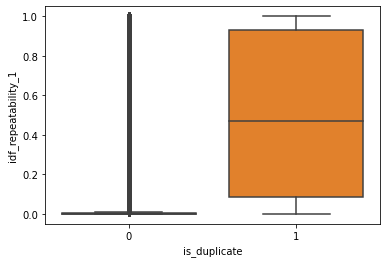

In [9]:
sns.boxplot(data=train_preprocessing, x="is_duplicate", y="idf_repeatability_1")

<AxesSubplot:xlabel='is_duplicate', ylabel='idf_repeatability_2'>

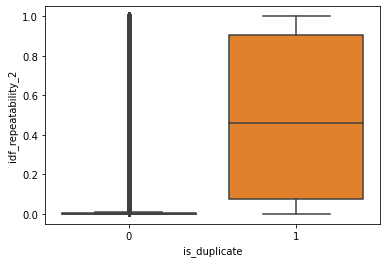

In [10]:
sns.boxplot(data=train_preprocessing, x="is_duplicate", y="idf_repeatability_2")

In [11]:
repeatability_1_1_8 = train_preprocessing['idf_repeatability_1'].loc[train_preprocessing['is_duplicate'] == 1].quantile(1/8)
repeatability_1_2_8 = train_preprocessing['idf_repeatability_1'].loc[train_preprocessing['is_duplicate'] == 1].quantile(2/8)
repeatability_1_3_8 = train_preprocessing['idf_repeatability_1'].loc[train_preprocessing['is_duplicate'] == 1].quantile(3/8)
repeatability_1_4_8 = train_preprocessing['idf_repeatability_1'].loc[train_preprocessing['is_duplicate'] == 1].quantile(4/8)
repeatability_1_5_8 = train_preprocessing['idf_repeatability_1'].loc[train_preprocessing['is_duplicate'] == 1].quantile(5/8)

print(repeatability_1_1_8, repeatability_1_2_8, repeatability_1_3_8, repeatability_1_4_8, repeatability_1_5_8, sep='\n')

0.02803738317757009
0.08461268909532296
0.2360532863672195
0.4715430521430259
0.7262619521798036


In [12]:
repeatability_2_1_8 = train_preprocessing['idf_repeatability_2'].loc[train_preprocessing['is_duplicate'] == 1].quantile(1/8)
repeatability_2_2_8 = train_preprocessing['idf_repeatability_2'].loc[train_preprocessing['is_duplicate'] == 1].quantile(2/8)
repeatability_2_3_8 = train_preprocessing['idf_repeatability_2'].loc[train_preprocessing['is_duplicate'] == 1].quantile(3/8)
repeatability_2_4_8 = train_preprocessing['idf_repeatability_2'].loc[train_preprocessing['is_duplicate'] == 1].quantile(4/8)
repeatability_2_5_8 = train_preprocessing['idf_repeatability_2'].loc[train_preprocessing['is_duplicate'] == 1].quantile(5/8)

print(repeatability_2_1_8, repeatability_2_2_8, repeatability_2_3_8, repeatability_2_4_8, repeatability_2_5_8, sep='\n')

0.02803738317757009
0.074151641378419
0.2360532863672195
0.4583793444199975
0.7035270829584308


In [13]:
train_preprocessing['is_duplicate_predict'] = np.where(((train_preprocessing['idf_repeatability_1'] > repeatability_1_4_8) &
                                                        (train_preprocessing['idf_repeatability_2'] > repeatability_2_1_8)) |
                                                       ((train_preprocessing['idf_repeatability_2'] > repeatability_2_4_8) &
                                                        (train_preprocessing['idf_repeatability_1'] > repeatability_1_1_8)), 1, 0)
train_preprocessing

,pair_id,name_1,name_2,is_duplicate,idf_name_1,idf_name_2,idf_repeatability_1,idf_repeatability_2,is_duplicate_predict
0,1,"[iko, industries, ltd]","[enormous, industrial, trade, pvt, ltd]",0,"{'iko': 3278.3642793987624, 'industries': 54.1...","{'enormous': 40302.5, 'industrial': 182.588762...",0.003994,0.000326,0
1,2,"[apcotex, industries, ltd]","[technocraft, industries, india, ltd]",0,"{'apcotex': 8602.853828306264, 'industries': 5...","{'technocraft': 29662.64, 'industries': 54.128...",0.007784,0.002262,0
2,3,"[rishichem, distributors, pvt, ltd]",[dsa],0,"{'rishichem': 78890.0, 'distributors': 4532.79...",{'dsa': 2107.919272313815},0.000000,0.000000,0
3,4,"[powermax, rubber, factory]","[co, one]",0,"{'powermax': 90434.87804878049, 'rubber': 94.3...","{'co': 22.992868659307952, 'one': 1456.9076620...",0.000000,0.000000,0
4,5,"[tress, as]","[longyou, industries, park, zhejiang]",0,"{'tress': 15321.611570247935, 'as': 1046.52272...","{'longyou': 36351.27450980392, 'industries': 5...",0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...
497814,497815,"[bitmat, products]","[the, goodyear, tire, and, rubber, company]",0,"{'bitmat': 16334.052863436122, 'products': 166...","{'the': 675.7481319482413, 'goodyear': 4017.15...",0.000000,0.000000,0
497815,497816,"[bnd, trading, co, ltd]","[zhong, shan, yue, liang, economy, trade, imp,...",0,"{'bnd': 17165.87962962963, 'trading': 66.28108...","{'zhong': 27263.455882352944, 'shan': 5296.9, ...",0.002105,0.000406,0
497816,497817,"[xeikon, industrial, co, ltd, of, dongguan, city]","[yi, cheng, trading, co, ltd, of, dongguan, city]",0,"{'xeikon': 66211.25, 'industrial': 182.5887624...","{'yi': 3628.013698630137, 'cheng': 5444.684287...",0.028507,0.175717,0
497817,497818,"[shanghai, kechuan, trading, co, ltd]","[shanghai, mg, stationery, inc]",0,"{'shanghai': 168.02601169166627, 'kechuan': 41...","{'shanghai': 168.02601169166627, 'mg': 10186.3...",0.004052,0.006708,0


In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [15]:
duplicate = train_preprocessing['is_duplicate']
duplicate_predict = train_preprocessing['is_duplicate_predict']

<AxesSubplot:>

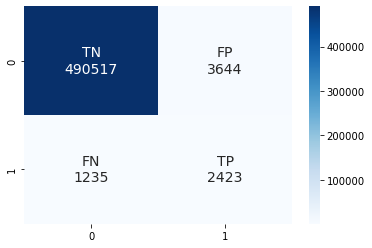

In [16]:
matrix_1 = confusion_matrix(duplicate, duplicate_predict)

group_names  = ['TN', 'FP', 'FN', 'TP']

group_counts = ["{0:0.0f}".format(value) for value in matrix_1.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names, group_counts)]


labels = np.asarray(labels).reshape(2,2)

sns.heatmap(matrix_1, annot=labels, annot_kws={"fontsize":14}, fmt='', cmap='Blues')

In [17]:
print('f1 score', round(f1_score(duplicate, duplicate_predict), 3))
print('accuracy score', round(accuracy_score(duplicate, duplicate_predict), 3))
print('precision score', round(precision_score(duplicate, duplicate_predict), 3))
print('recall score', round(recall_score(duplicate, duplicate_predict), 3))

f1 score 0.498
accuracy score 0.99
precision score 0.399
recall score 0.662


In [18]:
rslt_fn = train_preprocessing[(train_preprocessing['is_duplicate'] == 1) & (train_preprocessing['is_duplicate_predict'] == 0)]
rslt_fn

,pair_id,name_1,name_2,is_duplicate,idf_name_1,idf_name_2,idf_repeatability_1,idf_repeatability_2,is_duplicate_predict
1562,1563,"[total, ceska, republika, sro]","[total, france, arnay, le, duc]",1,"{'total': 1455.7636435021593, 'ceska': 29195.5...","{'total': 1455.7636435021593, 'france': 5051.5...",0.020499,0.020740,0
1786,1787,"[pt, bridgestone, tire, indonesia]","[bridgestone, do, brasil, industria, e, comenr...",1,"{'pt': 727.1680721710139, 'bridgestone': 1371....","{'bridgestone': 1371.2389053254437, 'do': 819....",0.236053,0.052324,0
2054,2055,"[pt, bridgestone, tire, indonesia]","[thai, bridgestone, co, ltd]",1,"{'pt': 727.1680721710139, 'bridgestone': 1371....","{'thai': 5251.883852691219, 'bridgestone': 137...",0.236053,0.205908,0
2815,2816,"[total, bitumen]","[total, czech, republic]",1,"{'total': 1455.7636435021593, 'bitumen': 2463....","{'total': 1455.7636435021593, 'czech': 25748.8...",0.371422,0.032451,0
3099,3100,"[sumitomo, rubber, usa, 10, sheridan]","[sumitomo, rubber, industriesusa]",1,"{'sumitomo': 2591.0761705101327, 'rubber': 94....","{'sumitomo': 2591.0761705101327, 'rubber': 94....",0.038255,0.105008,0
...,...,...,...,...,...,...,...,...,...
495936,495937,"[adams, resources, exploration, corporation, o...","[adams, resources, exploration, corporation, o...",1,"{'adams': 285217.6923076923, 'resources': 6609...","{'adams': 285217.6923076923, 'resources': 6609...",0.163406,0.119375,0
495979,495980,"[bridgestone, firestone, venezolana, c]","[bridgestone, huizhou, tire, co, ltd]",1,"{'bridgestone': 1371.2389053254437, 'firestone...","{'bridgestone': 1371.2389053254437, 'huizhou':...",0.038057,0.288837,0
496237,496238,"[bridgestone, stargard, sp, zoo]","[bridgestone, international, group]",1,"{'bridgestone': 1371.2389053254437, 'stargard'...","{'bridgestone': 1371.2389053254437, 'internati...",0.026614,0.785173,0
496574,496575,"[bridgestone, huizhousynthetic, rubber, co, ltd]","[bridgestone, india, pvt, ltd]",1,"{'bridgestone': 1371.2389053254437, 'huizhousy...","{'bridgestone': 1371.2389053254437, 'india': 1...",0.027181,0.878855,0


In [19]:
rslt_fp = train_preprocessing[(train_preprocessing['is_duplicate'] == 0) & (train_preprocessing['is_duplicate_predict'] == 1)]
rslt_fp

,pair_id,name_1,name_2,is_duplicate,idf_name_1,idf_name_2,idf_repeatability_1,idf_repeatability_2,is_duplicate_predict
113,114,"[louis, vuitton, india, retail, private, ltd]","[ag, india, retail, pvt, ltd]",0,"{'louis': 39029.789473684206, 'vuitton': 48153...","{'ag': 852.1788094690876, 'india': 103.8724226...",0.039665,0.793339,1
156,157,"[trelleborg, sealing, solutions, g]","[logistics, solutions, ltd]",0,"{'trelleborg': 5829.921383647799, 'sealing': 5...","{'logistics': 70.37867284184952, 'solutions': ...",0.064901,0.915798,1
176,177,"[sumitomo, rubber, industries, usa]","[rubber, india]",0,"{'sumitomo': 2591.0761705101327, 'rubber': 94....","{'rubber': 94.30842405127683, 'india': 103.872...",0.031400,0.475871,1
194,195,"[corning, display, technology, hefei, co, ltd]","[dow, corning, india, pvt, ltd]",0,"{'corning': 25571.241379310348, 'display': 386...","{'dow': 3298.7811387900356, 'corning': 25571.2...",0.186284,0.879975,1
547,548,"[the, order]","[to, the, order, emirates, nbd, sae]",0,"{'the': 675.7481319482413, 'order': 2385.99099...","{'to': 1483.7254901960785, 'the': 675.74813194...",1.000000,0.033049,1
...,...,...,...,...,...,...,...,...,...
497177,497178,"[sumitomo, warehouse, usa, inc]",[usa],0,"{'sumitomo': 2591.0761705101327, 'warehouse': ...",{'usa': 263.95885242400516},0.045485,1.000000,1
497270,497271,"[worldwide, express, inc]","[worldwide, seafood, products, llc]",0,"{'worldwide': 1764.7929557353643, 'express': 1...","{'worldwide': 1764.7929557353643, 'seafood': 1...",0.516925,0.104217,1
497399,497400,"[russian, ferro, alloys]","[ferro, star]",0,"{'russian': 40745.38461538461, 'ferro': 63928....","{'ferro': 63928.103448275855, 'star': 1891.749...",0.421667,0.971259,1
497567,497568,"[termoplastica, de, alba, sa, de, cv]","[neumaticos, del, alba, sa, neumalba]",0,"{'termoplastica': 25928.88111888112, 'de': 40....","{'neumaticos': 8294.921700223715, 'del': 2426....",0.789382,0.321684,1
